# _Titanic practice_
This work is generally based on niklas donges work with a few modification it will be copied several times and highly commented and modified in the future

In [1]:
#for linear algebra
import numpy as np

#for processing and cleaning data
import pandas as pd

#for data visualisation
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')


# collecting Data

In [2]:
test_data = pd.read_csv('.../input/titanic/test.csv')
train_data = pd.read_csv('..../input/titanic/train.csv')


# data analysis


initial investigation of a relatively clean dataset from kaggle to 
* check size 
* number of columns
* the nature of values contained in each column
* missing values in each column
 0. PassengerId: unique to each passenger 
 1.   Survived: Y/N (1/0) did they live of die? 
 2.   Pclass:what level of comfort on the ship were they  
 3.   Name: names of the passengers        
 4.   Sex: M/F
 5.   Age    
 6.   SibSp: how many spouses/siblings did they have
 7.  Parch: how many children did they have
 8.   Ticket: ticket number
 9.   Fare:    passenger fare
 10.  Cabin: cabin number
 11.  Embarked: port of embarkment

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#describe gives a basic statiscal analysis of data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#head gives a view of the first n rows
train_data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


from this tables it can be seen that some values cannot be processed by the algorithm such as names and gender,thus they need to converted to numerical values of removed if deemed unimportant, the removing of missing values . this process is called **data cleaning**

In [6]:
# study of actual missing data
total = train_data.isnull().sum().sort_values(ascending=True) #sort by ascending number missing values
percentageA = train_data.isnull().sum()/train_data.isnull().count()*100   #converts total to percentage
percentageB = (round(percentageA)).sort_values(ascending=True)     #approximates percentage and sorts my number ascending order
missing_data = pd.concat([total, percentageB], axis=1, keys= ['total','%'])     
missing_data

,total,%
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0
Embarked,2,0.0


as we can see all only three columns showcased missing values, the embarked has only two misssing values which can be filled, cabin has an alrarming number of missing values (77%) but the cabin number may seem inconsequential thus might be dropped from the data set, the age need to further looked into.

for presentation puropse the code should be written as **ascending=False** since it quickly tapers to zero

In [7]:
#make columns an array inorder to delete sections of the table
train_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# Age and gender as indicators of survivability

there are eleven features that make up this dataset, to determine whichshow a significant effect by visualisation then removal; 
visualisation method: google hoe best to visualise three point data then check in a textbook 

Text(0.5, 1.0, 'male')

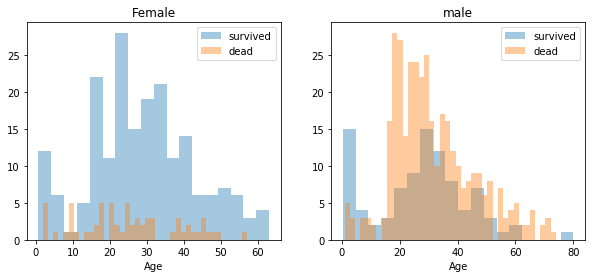

In [8]:
survived = 'survived'
dead = 'dead'
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4)) #specfies number of rows and columns for the histogram
women = train_data[train_data['Sex']=='female']           # specifies what part of the data set you are referring to
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(),bins=18, label = survived, ax =axes[0], kde=False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(),bins=40, label = dead, ax =axes[0], kde=False)
ax.legend()    #procedure for defininng a dual plotseaborn graph
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(),bins=18, label = survived, ax =axes[1], kde=False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(),bins=40, label = dead, ax =axes[1], kde=False)
ax.legend()
ax.set_title('male')                  



from the graph it can be seen that women in general had a much higher survival rate than men, but the age also had effects on the survival rate, women had the highest survival rate between the age of 18 to 40 but in general had majority survival over death
while males only had a lower death to survival rate under the age of 20

# point of embarkment

the passengers on the titanic boarded the ship at three different points
* Cherbourg
* Queenstown
* Southhampton
in order to checkif the point of embarkment is an insignificant value it is related with two different other features **gender** and **passenger class**

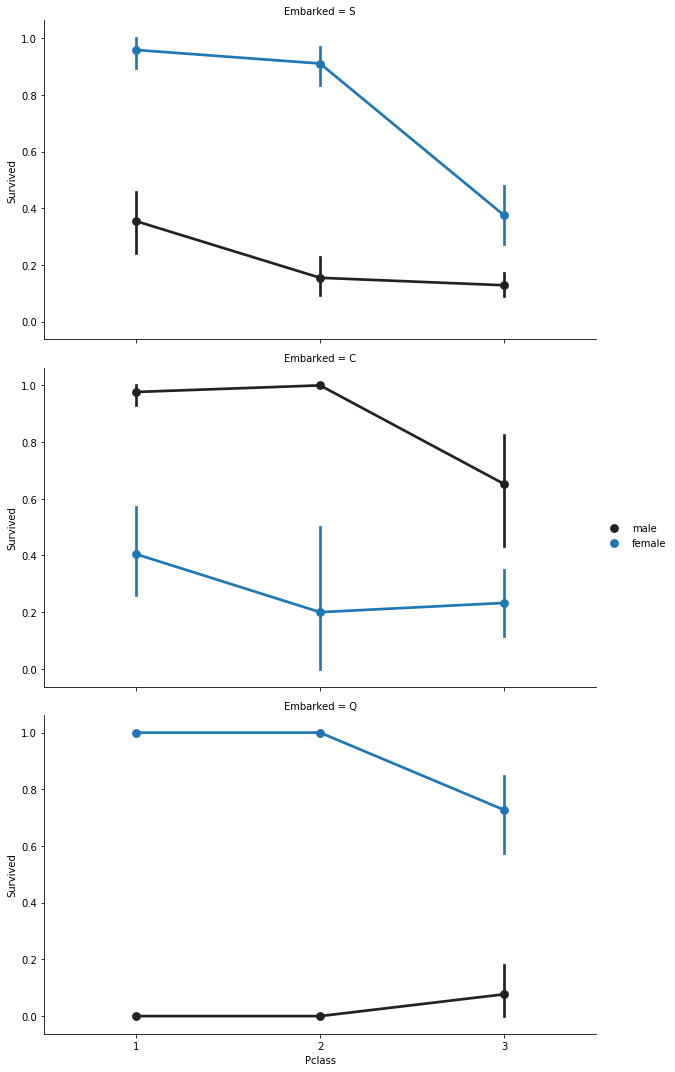

In [9]:
FacetGrid = sns.FacetGrid(train_data, row='Embarked', height=5, aspect=1.7)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', pallette=None, order=None, hue_order=None)
FacetGrid.add_legend()

embarkment correlate with survival based on gender with wonen from port **S** and **Q** having a higher chance of survival than women from port **C**
men on the other had the HIghest survival rate had a higher survival rate at port **C**
in all case with the exception of of port C the higher class members regardless of gender

## Pclass

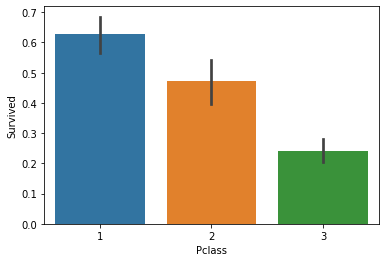

In [10]:
sns.barplot(x='Pclass', y="Survived", data=train_data)

1st class passengers are more likely to survive, while third class passengers are least like to survive tofind the ratio of survivals ro death we creat two plots per class to compare the survival rates

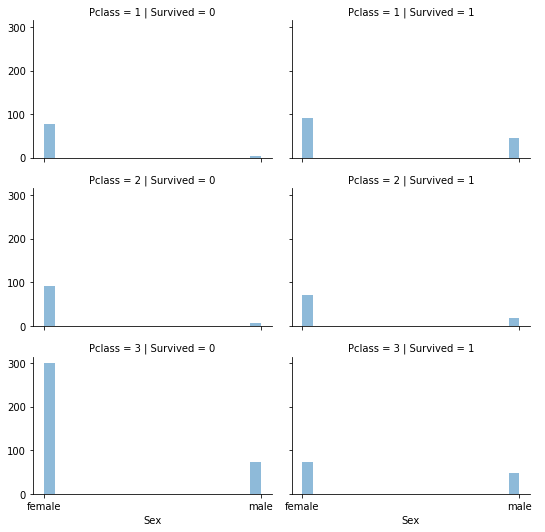

In [11]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', height=2.5, aspect= 1.5)
grid.map(plt.hist,'Sex', alpha=.5, bins=20)
grid.add_legend();

there is an incredibly high probablity that an individual in the third class would not survive regardless of gender

## sibling, spouses and parents = relatives

In [12]:
data = [train_data, test_data]
for dataset in data: 
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] >0,'not_alone'] = 0
    dataset.loc[dataset['relatives'] ==0,'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)


In [13]:
train_data['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

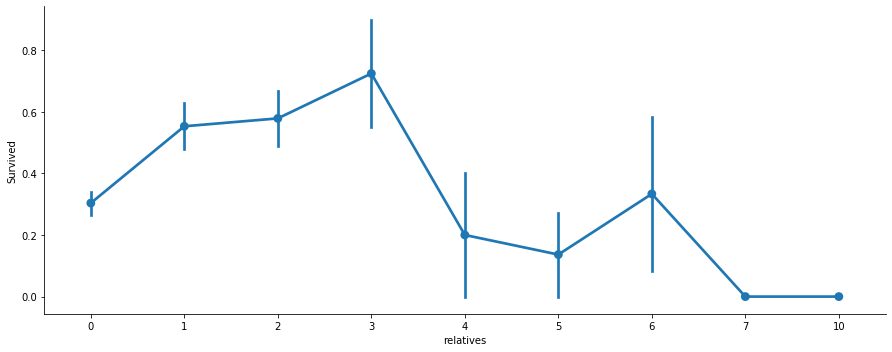

In [14]:
axes = sns.catplot( 'relatives', 'Survived', kind='point', data=train_data, aspect=2.5) 
#default has to include point to change it from default strip in the new catplot

# data processing
it is important to drop unimportant features from the data set
passenger id is unimportant as the name of the passenger serves the same purpose

In [15]:
train_data = train_data.drop(['PassengerId'], axis=1)

In [16]:
#clean cabin and use it to create a new feature, it alsoconverts missing data to x
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_data, test_data]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

In [17]:
#drop the cabin feature
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

the goal of the above code is to convert the cabine numbers into a purely numerical data set based on the decks in titatnic

In [18]:
# this the goal is to replace the missing age data with random numbers that are within + or - standard deviation of the 
#mean age of the passengers (dayo reread this code and explain each line for future reference)
data = [train_data, test_data]

for dataset in data:
    mean = train_data['Age'].mean()
    std = test_data['Age'].std()
    missing_ages = dataset['Age'].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean-std, mean+std, size = missing_ages) #randint ensures the numbers are integers
    # fill NaN values in Age column with random values generated
    age_slice = dataset['Age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset['Age'] = age_slice  #this lince coverts the copy into the real code
    dataset['Age'] = train_data['Age'].astype(int)

In [19]:
train_data["Age"].isnull().sum() #this checks for number of missing values

0

embarked onlt has two missing values so it can be replaced with the most common value

In [20]:
train_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [21]:
#since S is the top value
data = [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S') #fillna fills up missing values

In [22]:
train_data['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [23]:
#check the current state of changes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


it is importantfor all value to be integers inoder to be able to be processed by the models thus Fare, enarked, ticket, sex and age should be convertedto integer

# Fare

In [24]:
data = [train_data, test_data]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

# name 
the first step to converting state is to remove the unnnecassary part of the name and leave titles as titls can tell the level of importance of a passenger

In [25]:
data = [train_data, test_data]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} #dictionaries are important in the conversion process

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False) 
    #divides a stting by removing the alphabets before the.
    # replace titles fancy titles with their common equivalent and less common tittles as rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers, map follows the dictionary pattern
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

In [26]:
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

# Sex
Convert 'Sex' feature into numeric

In [27]:
genders = {"male": 0, "female": 1}
data = [train_data, test_data]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [28]:
train_data['Ticket'].describe() 

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

**tickets** are too many unique objects thus willbe two difficult to make numeric


In [29]:
train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

In [30]:
#Convert 'Embarked' feature into numeric.
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

age has too many tiny values and is thus converted in to age groups per decade to make it broader

In [31]:
data = [train_data,test_data]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int) #converts age to integer
    dataset.loc[(dataset['Age'] <=11), 'Age'] =0
    dataset.loc[(dataset['Age'] >11) & (dataset['Age'] <= 18), 'Age'] =1 #transforms values within from 12 to 18 to age group 1
    dataset.loc[(dataset['Age'] >18) & (dataset['Age'] <= 22), 'Age'] =2
    dataset.loc[(dataset['Age'] >22) & (dataset['Age'] <= 27), 'Age'] =3
    dataset.loc[(dataset['Age'] >27) & (dataset['Age'] <= 33), 'Age'] =4
    dataset.loc[(dataset['Age'] >33) & (dataset['Age'] <= 40), 'Age'] =5
    dataset.loc[(dataset['Age'] >40) & (dataset['Age'] <= 66), 'Age'] =6
    dataset.loc[ dataset['Age'] >66, 'Age'] =6

In [32]:
#check the distribution
train_data['Age'].value_counts()

4    171
6    154
5    153
3    135
2    114
1     96
0     68
Name: Age, dtype: int64

it is important to survey the distribution so has not to have too many in a group that will ruin the didtribution, thus the changes were toggle till we had around the sma values in each distribution

In [33]:
train_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1


from the table below one can see that the all the datasets are numerical, and are integers
when running any model it is important that the values in the the dataset are not far apart from each other this is the end goal in cleaning any dataset, the Fare data set does not fuffil this condition and it is important to properly categorise it
but it will not fall neatly into categories like Age thus another method has to be used, by using Qcut I can descide a reasonable way to divide the data into 6 like the age

In [34]:
newfare = pd.qcut(train_data['Fare'],6)
newfare
pd.value_counts(newfare)

(-0.001, 7.0]    241
(14.0, 26.0]     165
(52.0, 512.0]    146
(8.0, 14.0]      146
(26.0, 52.0]     123
(7.0, 8.0]        70
Name: Fare, dtype: int64

In [35]:
data = [train_data, test_data]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 8), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 14), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 26), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 26) & (dataset['Fare'] <= 52), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 52, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [36]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,0,0,1,0,8,1
1,1,1,1,5,1,0,5,1,1,0,3,3
2,1,3,1,3,0,0,0,0,0,1,8,2
3,1,1,1,5,1,0,5,0,1,0,3,3
4,0,3,0,5,0,0,1,0,0,1,8,1
5,0,3,0,5,0,0,1,2,0,1,8,1
6,0,1,0,6,0,0,4,0,0,1,5,1
7,0,3,0,0,3,1,3,0,4,0,8,4
8,1,3,1,3,0,2,2,0,2,0,8,3
9,1,2,1,1,1,0,4,1,1,0,8,3


all the valuesare now under ten

# creating new features

we need to create new features to increase the sensitivity of the models? ionno man

In [37]:
 #Age times Class #reasoning
data = [train_data, test_data]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']


In [38]:
#Fare per Person reasoning
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)


In [39]:
#a last look at the training set, before we start training the models.
train_data.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,5,1,1,0,3,3,5,2
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,5,0,1,0,3,3,5,2
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,5,0,0,1,2,0,1,8,1,15,1
6,0,1,0,6,0,0,4,0,0,1,5,1,6,4
7,0,3,0,0,3,1,3,0,4,0,8,4,0,0
8,1,3,1,3,0,2,2,0,2,0,8,3,9,0
9,1,2,1,1,1,0,4,1,1,0,8,3,2,2


# modelling

In [40]:
X_train = train_data.drop("Survived", axis=1) #drop the answers from the training datasets
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy() #passengerId is the only parameter we havent dropped from the test data

In [41]:
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
print(round(acc_sgd,2,), "%")

64.31 %


In [42]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")


92.48 %


In [43]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")

81.59 %


In [44]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")

87.21 %


In [45]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

77.33 %


In [46]:
# Perceptron
perceptron = Perceptron(max_iter=10)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(round(acc_perceptron,2,), "%")

77.89 %


In [47]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, )
print(round(acc_linear_svc,2,), "%")

81.0 %


In [48]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")


92.48 %


# whichis one is is the best

In [49]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.48,Random Forest
92.48,Decision Tree
87.21,KNN
81.59,Logistic Regression
81.00,Support Vector Machines
77.89,Perceptron
77.33,Naive Bayes
64.31,Stochastic Gradient Decent


to find the actual precision of the Randomforest **read about the stsatistic behind to models to improve your choosing skils**

In [50]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Scores: [0.73333333 0.83146067 0.73033708 0.82022472 0.87640449 0.85393258
 0.80898876 0.76404494 0.87640449 0.83146067]
Mean: 0.8126591760299625
Standard Deviation: 0.051030371437732355


In [51]:
#finding out the level of importance each feature had
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

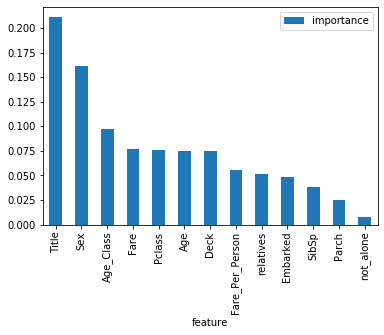

In [52]:
importances.plot.bar()

In [53]:
#remove low importance features to reduce overfitting
train_data  = train_data.drop("not_alone", axis=1)
test_data  = test_data.drop("not_alone", axis=1)

train_data  = train_data.drop("Parch", axis=1)
test_data  = test_data.drop("Parch", axis=1)


In [54]:
#Training random forest again:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.48 %


In [55]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.03 %


In [56]:
#t0 check for false positives andnegatives
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[474,  75],
       [101, 241]], dtype=int64)

The first row is about the not-survived-predictions: 483 passengers were correctly classified as not survived (called true negatives) and 56 where wrongly classified as not survived (false positives).

The second row is about the survived-predictions: 93 passengers where wrongly classified as survived (false negatives) and 249 where correctly classified as survived (true positives). _correct it_

In [57]:
#testing precision
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))
Precision: 0.801948051948
Recall: 0.722222222222

Precision: 0.7626582278481012
Recall: 0.7046783625730995


In [58]:
#F score
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7325227963525835

In [59]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)

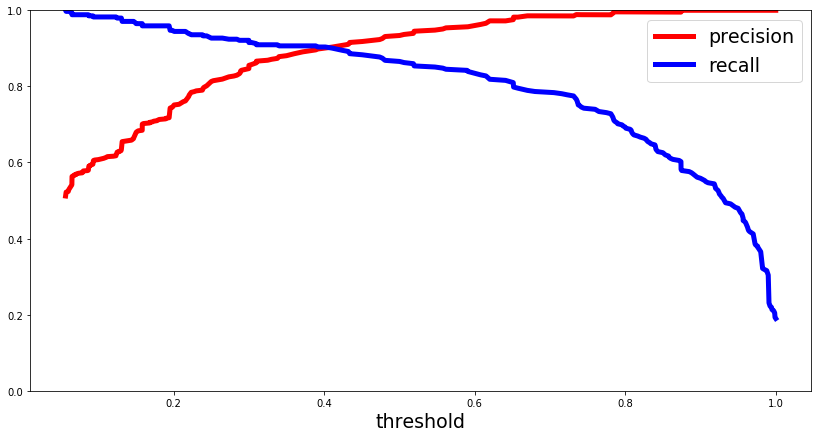

In [60]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [61]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)


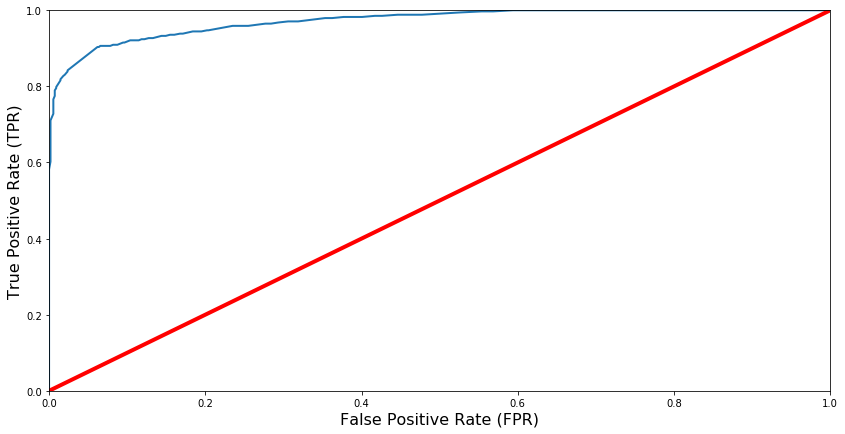

In [62]:
#plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()


In [63]:
#check a score you submit to kaggle
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9717881528350323


In [64]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_prediction
    })
submission.to_csv('submission.csv', index=False) #

# what did i learn and what will i do next


# THE END